Cost after iteration 0: 1.041733
Cost after iteration 1000: 0.278238
Cost after iteration 2000: 0.275367
Cost after iteration 3000: 0.273691
Cost after iteration 4000: 0.272287
Cost after iteration 5000: 0.271111
Cost after iteration 6000: 0.270065
Cost after iteration 7000: 0.269067
Cost after iteration 8000: 0.268080
Cost after iteration 9000: 0.267089
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.5 0.5 0.5 1.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. ]]
准确率为：98.333333 %


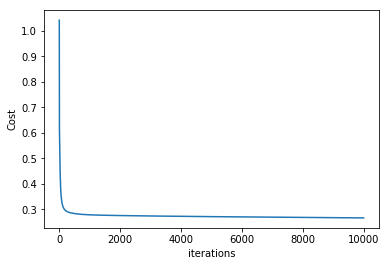

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from Forward_NeuralNetwork import *

with open("iris.txt", 'r') as f:
    data = f.read()
    data = data.replace('Iris-setosa', '0,')
    data = data.replace('Iris-versicolor', '0.5,')
    data = data.replace('Iris-virginica', '1,')
with open("iris1.txt", 'w') as fw:
    fw.write(data)
    fw.close()       

def load_txt():
    """加载处理好存入txt格式的数据"""
    tmp = np.loadtxt("iris1.txt",dtype=np.str, delimiter=",")
    data = tmp[0:, 0:4].astype(np.float)
    label = tmp[0:, 4].astype(np.float)
    label = label.reshape(150, 1)
    return data.T, label.T


def normalized(X):
    """
    :param X: 待归一化的数据 
	:return: 
	X：归一化后的数据
	"""
    Xmin, Xmax = X.min(), X.max()
    XN = (X - Xmin) / (Xmax - Xmin)
    return XN

def main():

    X, Y = load_txt()
    X = normalized(X)
    Y = normalized(Y)
    """训练集90个数据"""
    train_x = np.hstack((X[:, 0:30], X[:, 50:80], X[:, 100:130]))
    train_y = np.hstack((Y[:, 0:30], Y[:, 50:80], Y[:, 100:130]))
    """测试集60个数据"""
    test_x = np.hstack((X[:, 30:50], X[:, 80:100], X[:, 130:150]))
    test_y = np.hstack((Y[:, 30:50], Y[:, 80:100], Y[:, 130:150]))
    """训练，中间层10个神经元，迭代10000次，学习率0.25"""
    n_h = 10
    parameter, cost_list = nn_model(train_x, train_y, n_h, num_iterations=10000, learning_rate=0.25, print_cost=True)
    """测试，代入测试集数据"""
    A2, cache = forward_propagation(test_x, parameters=parameter)
    TY = A2
    TY[TY > 0.8] = 1
    TY[TY < 0.2] = 0
    TY[(TY >= 0.2) & (TY <= 0.8)] = 0.5
    print(A2)
    count = 0
    for i in range(0, 60):
        if TY[0, i] == test_y[0, i]:
            count += 1
    print("准确率为：%f %%" %(100*count/60))
    """绘制梯度下降曲线"""
    plt.plot(cost_list)
    plt.xlabel("iterations")
    plt.ylabel("Cost")
    plt.show()


if __name__ == '__main__':
    main()